In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Examples of different graph types at [Python Graph Gallery](https://python-graph-gallery.com/stacked-area-plot/).

For this example, I am (mis)using a stacked area graph to generate the below plots.

# Waveform Generation

no. of samples: 20000
0.00000    0.678949
0.00005    0.877187
0.00010    0.379027
0.00015    0.983328
0.00020    0.346930
dtype: float64


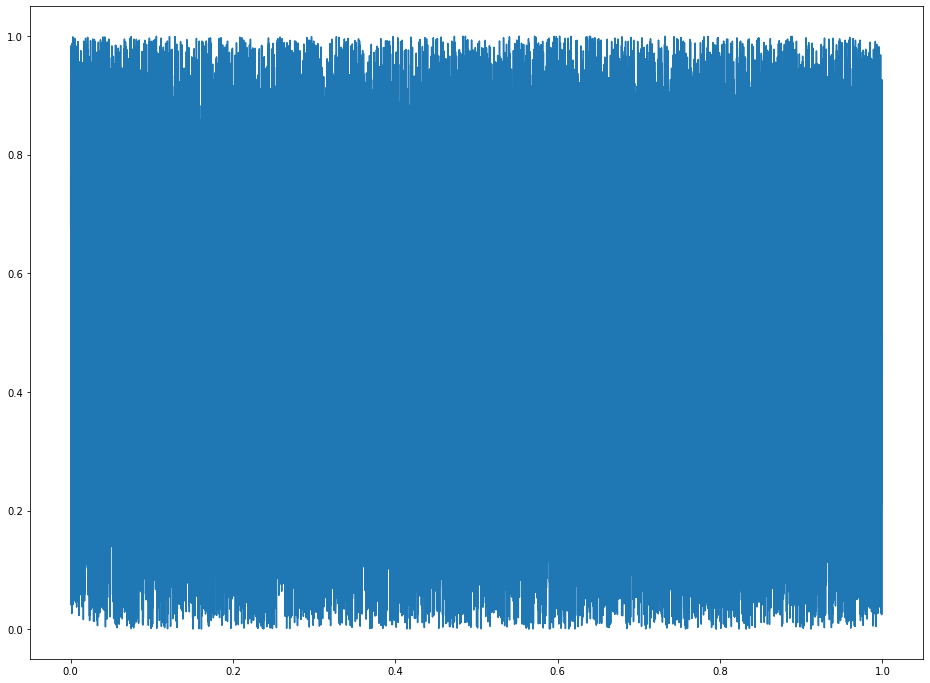

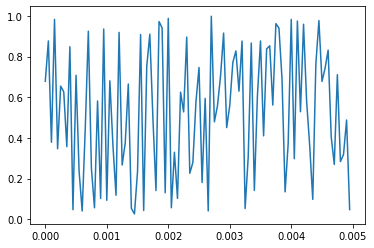

In [2]:
def generate_uniform_dist_waveform(n):
    x = np.random.random(n)
    waveform = pd.Series(x)
    waveform.index = waveform.index / n
    return waveform


def generate_phase_scrambled_waveform(n):
    cycle_len = 3000
    x = (np.arange(n) % cycle_len == cycle_len // 3).astype(np.int)
    
    x_fft = np.fft.rfft(x)
    pshift = np.arange(len(x_fft))**1.5
    x_pshift = np.fft.irfft(x_fft * (np.cos(pshift) + 1j*np.sin(pshift)))
    
    waveform = pd.Series(10*x_pshift)
    waveform.index = waveform.index / n
    return waveform


def generate_binary_waveform(n):
    x = (np.random.random(n) > 0.5).astype(np.float)
    waveform = pd.Series(x)
    waveform.index = waveform.index / n
    return waveform
    

x = generate_uniform_dist_waveform(20000)

print('no. of samples:', len(x))
print(x.head())

plt.figure(figsize=(16, 12))
plt.plot(x)
plt.show()

plt.plot(x.iloc[:100])
plt.show()

# Percentile Plots

## Helper Functions

In [3]:
import sys; sys.path.append('./..')
from distr_plot_helper import resize2D_to_rectangular, make_wave_dist_array


def bins(array, no_segments):
    return (
        np.split(array, np.linspace(0, 1, no_segments+1, endpoint=True)[1:-1]),
        np.linspace(0, 1, 2*no_segments+1, endpoint=True)[1:-1:2]
    )


def widths_sequence(series, no_segments, max_percentiles=np.inf):
    bs, positions = bins(series, no_segments)
    bins_array = resize2D_to_rectangular(bs).T
    wave_dist_array = make_wave_dist_array(bins_array, max_percentiles=max_percentiles)
    
    return wave_dist_array, positions

In [4]:
def make_colors(splits):
    splits = splits-2
    return [(0, 0, 0, 0)] + [
        3*(0.75*np.abs(i/(splits/2) - 1),) + (1,)
        for i in range(splits)
    ] + [(0, 0, 0, 0)]


## Plots

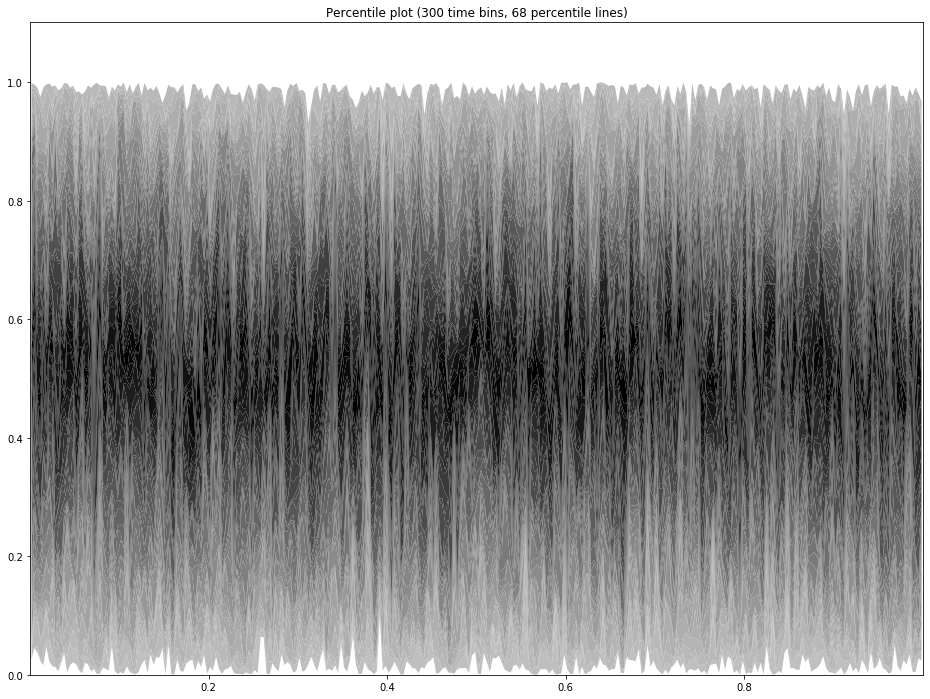

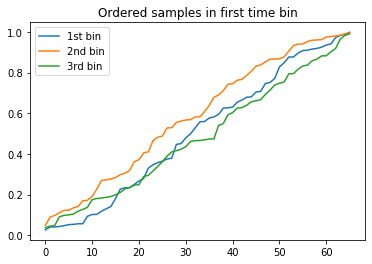

In [5]:
Y, X = widths_sequence(x, 300)

plt.figure(figsize=(16, 12))
plt.stackplot(X, Y, colors=make_colors(Y.shape[0]), baseline='sym')
plt.title("Percentile plot ({1} time bins, {0} percentile lines)".format(*Y.shape))
plt.xlim((x.min(), x.max()))
plt.ylim((Y.min(), Y.max()))
plt.show()

bin_len = len(x)//Y.shape[1]
plt.plot(np.sort(x.iloc[:bin_len]), label='1st bin')
plt.plot(np.sort(x.iloc[bin_len:2*bin_len]), label='2nd bin')
plt.plot(np.sort(x.iloc[2*bin_len:3*bin_len]), label='3rd bin')
plt.title("Ordered samples in first time bin")
plt.legend()
plt.show()

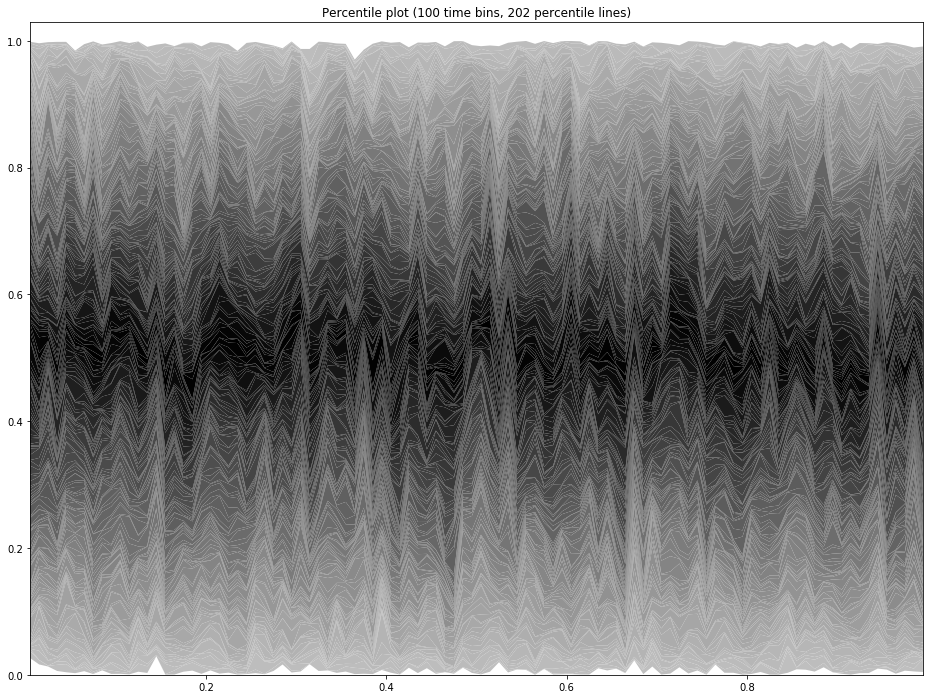

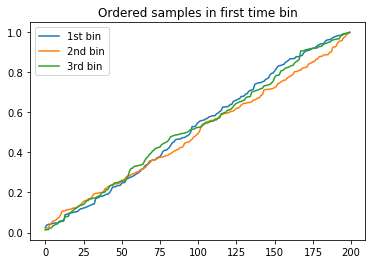

In [6]:
Y, X = widths_sequence(x, 100)#, 50)

plt.figure(figsize=(16, 12))
plt.stackplot(X, Y, colors=make_colors(Y.shape[0]), baseline='sym')
plt.title("Percentile plot ({1} time bins, {0} percentile lines)".format(*Y.shape))
plt.xlim((X.min(), X.max()))
plt.ylim((Y.min(), Y.max()))
plt.show()

bin_len = len(x)//Y.shape[1]
plt.plot(np.sort(x.iloc[:bin_len]), label='1st bin')
plt.plot(np.sort(x.iloc[bin_len:2*bin_len]), label='2nd bin')
plt.plot(np.sort(x.iloc[2*bin_len:3*bin_len]), label='3rd bin')
plt.title("Ordered samples in first time bin")
plt.legend()
plt.show()

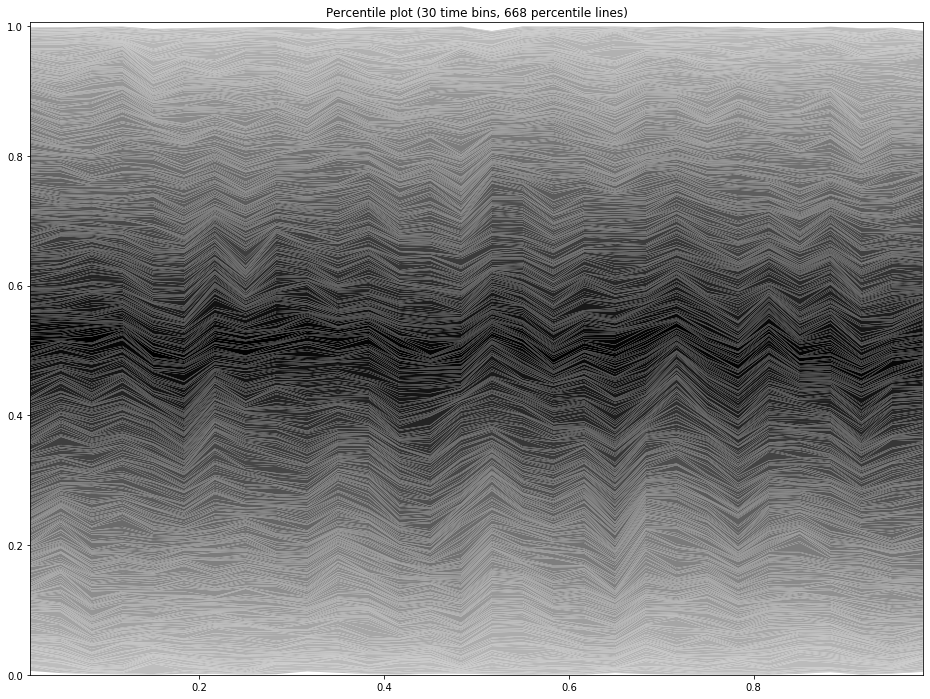

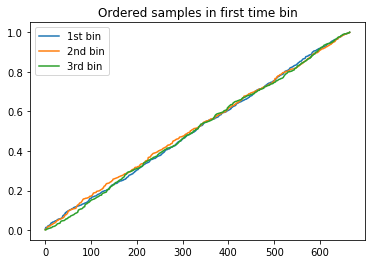

In [7]:
Y, X = widths_sequence(x, 30)

plt.figure(figsize=(16, 12))
plt.stackplot(X, Y, colors=make_colors(Y.shape[0]), baseline='sym')
plt.title("Percentile plot ({1} time bins, {0} percentile lines)".format(*Y.shape))
plt.xlim((X.min(), X.max()))
plt.ylim((Y.min(), Y.max()))
plt.show()

bin_len = len(x)//Y.shape[1]
plt.plot(np.sort(x.iloc[:bin_len]), label='1st bin')
plt.plot(np.sort(x.iloc[bin_len:2*bin_len]), label='2nd bin')
plt.plot(np.sort(x.iloc[2*bin_len:3*bin_len]), label='3rd bin')
plt.title("Ordered samples in first time bin")
plt.legend()
plt.show()